# IMPORTATION

In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import matplotlib
from matplotlib import pyplot as plt
import codecs
import PyPDF2
%matplotlib inline
import spacy
import fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

# OPEN 2nd & 3rd pages

In [ ]:
#open the file
pdfFileObj = open("Decret1.pdf", 'rb')
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

# printing number of pages in pdf file 
print(pdfReader.numPages) 

# creating a page object 
pageObj = pdfReader.getPage(1) 

text = pageObj.extractText()
text2 = ''

#number_of_pages = read_pdf.getNumPages()
number_of_pages = 3
for page_number in range(1,number_of_pages):   # use xrange in Py2
    page = pdfReader.getPage(page_number)
    page_content = page.extractText()
    text2 = text2 + page_content

# extracting text from page 
print(text2) 
print('---------------------')
print('---------------------')
print(len(text))  
print(type(text))
# closing the pdf file object 
pdfFileObj.close()



# PRE-PROCESSING

In [ ]:
def  r_punctuation(text):
    """ Return a cleaned version of text
    """
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text

#text = str(pageObj)
text = r_punctuation(text2)




import unidecode
unaccented_string = unidecode.unidecode(text)



nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('french') #pour le text en français 
#print(np.array(sw))
#print(len(np.array(sw)))
#Tokens = str(Tokens)
#print('Len before stopwords removing :' ,len(print(unaccented_string)))
print('---------------------')
print('---------------------')
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

stopw = stopwords(unaccented_string)





def return_token(sentence):
    # Tokeniser la phrase
    return nlp(sentence)
    # Retourner le texte de chaque token
    #return [X.text for X in doc]

TokensList = return_token(stopw)






from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def return_stem(sentence):
    #doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in sentence]

Stemmatized = return_stem(TokensList)






def return_POS(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner les étiquettes de chaque token
    return [(X, X.pos_) for X in doc]
Stem_for_pos = str(Stemmatized)
return_POS(Stem_for_pos)



# N-grams

In [ ]:
from nltk.util import ngrams
list(ngrams(TokensList, 2))

# TF-idf   (for choosing the medium fraquency n-grams)

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf  = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
features = tfidf.fit_transform(Stemmatized)
df = pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)
print (df.iloc[ 0:22 , : ])'''

# Word2vec by gensim

In [ ]:
# sg : CBOW(0) --- Skip gram (1)
from gensim.models import Word2Vec
#model = Word2Vec([Stemmatized], min_count=1,size= 50,workers=3, window =3, sg = 0)  
model = Word2Vec([features], min_count=1,size= 50,workers=3, window =3, sg = 1)

In [ ]:
model['region']

In [ ]:
#model['provinc']
model.similarity('region', 'provinc')

In [ ]:
model.most_similar('region')[:5]

# Similarity based on cosine

In [148]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'region',Stemmatized,5)

[('11', 0.32976258),
 ('safar', 0.30346042),
 ('maroc', 0.29725486),
 ('stipulent', 0.29666945),
 ('90', 0.29652095)]

# T-SNE Visualization

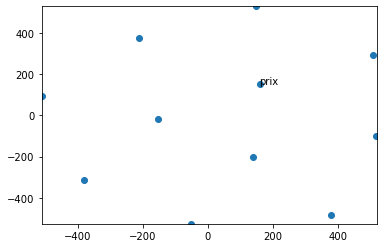

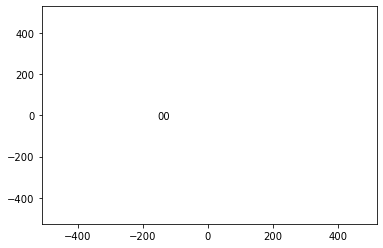

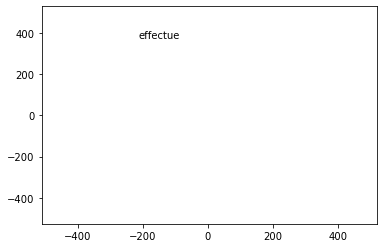

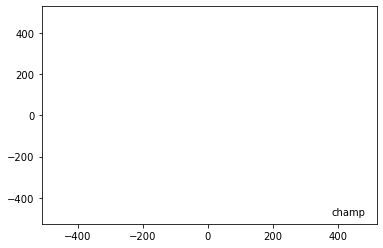

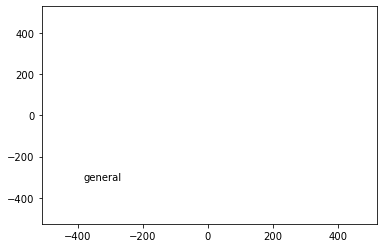

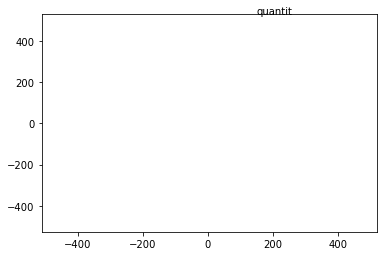

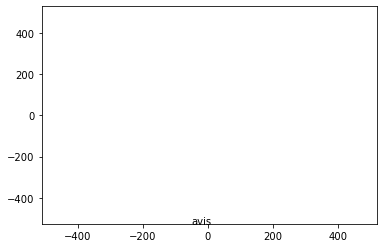

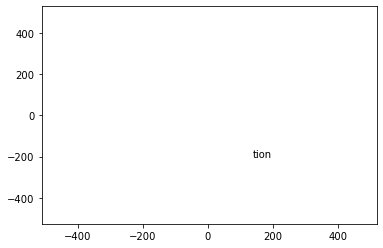

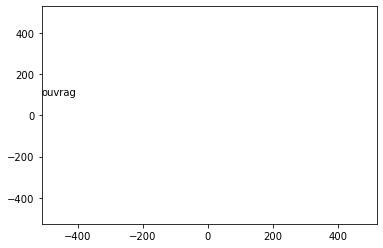

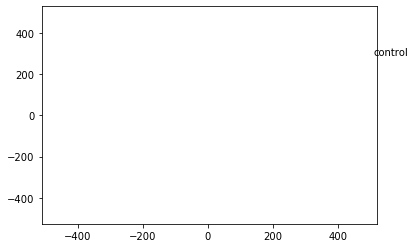

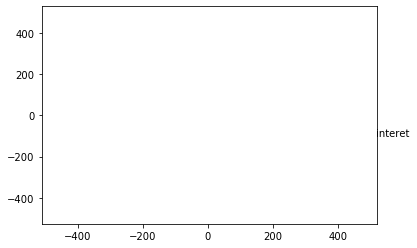

In [149]:
def display_closestwords_tsnescatterplot(model, word, size):
    
        arr = np.empty((0,size), dtype='f')
        word_labels = [word]
        close_words = model.similar_by_word(word)
        arr = np.append(arr, np.array([model[word]]), axis=0)
        for wrd_score in close_words:
            wrd_vector = model[wrd_score[0]]
            word_labels.append(wrd_score[0])
            arr = np.append(arr, np.array([wrd_vector]), axis=0)

        tsne = TSNE(n_components=2, random_state=0)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)
        x_coords = Y[:, 0]
        y_coords = Y[:, 1]
        plt.scatter(x_coords, y_coords)
        for label, x, y in zip(word_labels, x_coords, y_coords):
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
            plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
            plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
            plt.show()
display_closestwords_tsnescatterplot(model, 'prix', 50) 